# p06: Variable coefficient wave equation

Solve using FFT

$$
u_t + c(x) u_x = 0, \qquad x \in (0,2\pi), \qquad c(x) = \frac{1}{5} + \sin^2(x-1)
$$

with initial condition

$$
u(x,0) = u_0(x) = \exp(-100(x-1)^2)
$$

periodic boundary conditions and Leapfrog scheme in time: for $n=1,2,\ldots$

$$
v_j^{n+1} = v_j^{n-1} - (2 \Delta t) c(x_j) w_j^n, \qquad w_j^n \approx u_x(x_j, t_n)
$$

Take initial values

$$
v_j^0 = u_0(x_j), \qquad v_j^{-1} = u_0(x_j + c(x_j)\Delta t)
$$

In [23]:
%config InlineBackend.figure_format='svg'
from matplotlib.collections import PolyCollection
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure

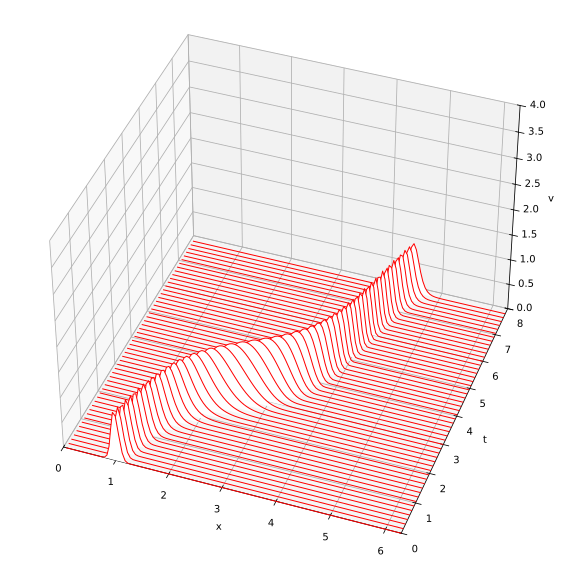

In [24]:
# Set up grid and differentiation matrix:
N = 128; h = 2*pi/N; x = h*arange(1,N+1);
t = 0.0; dt = h/4.0
tmax = 8.0; tplot = 0.15;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))

c = 0.2 + sin(x-1.0)**2
v = exp(-100.0*(x-1.0)**2); vold = exp(-100.0*(x+c*dt-1.0)**2);

# wave numbers
ik = 1j*zeros(N)
ik[0:N//2+1] = 1j*arange(0,N//2+1)
ik[N//2+1:]  = 1j*arange(-N//2+1,0,1)

# Time-stepping by leap-frog formula
data = []; data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        v_hat = fft(v)
        w_hat = ik * v_hat; w_hat[N//2] = 0.0
        w = real(ifft(w_hat))
        vnew = vold - 2.0*dt*c*w
        vold = v; v = vnew;
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = PolyCollection(data, closed=False, facecolors='white', edgecolors='red')
poly.set_alpha(1)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('v')
ax.set_xlim3d(0, 2*pi); ax.set_ylim3d(0, 8); ax.set_zlim3d(0, 4)
ax.view_init(40,-70)

## Make animation

In [25]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*pi), ylim=(-0.1, 1.1))
line, = ax.plot([], [], 'r-', lw=2, label='u')
ax2 = ax.twinx()
speed, = ax2.plot(x,c,'k:',lw=1,label='c')
ax.legend(loc='upper left'), ax2.legend(loc='upper right')
ax.set_xlabel('x'); ax.set_ylabel('u'); ax2.set_ylabel('c')
plt.close();

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x, v = zip(*data[i])
    line.set_data(x, v)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data), interval=50, blit=True)
# Save to file
try:
    anim.save('p06.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
except:
    print("Cannot save mp4 file")

In [26]:
# Use this for inline display with controls
anim

The dotted line shows the speed function $c(x)$.

In [27]:
# Use this for inline display of movie
#from IPython.display import HTML
#HTML(anim.to_html5_video())